In [1]:
import tifffile as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# open data
img = tf.imread(r"data_from_bioimg_arx\PR006_R.tif")
img.shape

(260, 4, 2379, 2007)

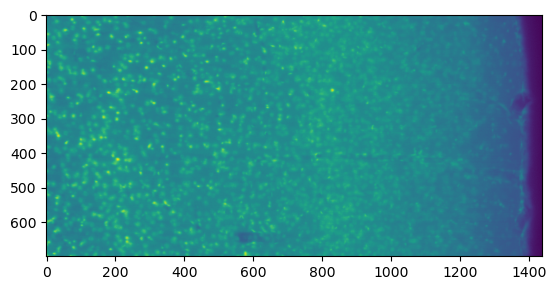

In [3]:
# grab single image slice
img_slice = img[132,2,950:1650,260:1700]
plt.imshow(img_slice)
img_slice = np.rot90(img_slice)

In [4]:
# iterate through y lines, building an intensity list across the depth of the slice
intensity_list = []
for y_pos in range(img_slice.shape[0]):
    intensity_list.append(np.mean(img_slice[y_pos,:]))
intensity_list = np.array(intensity_list)

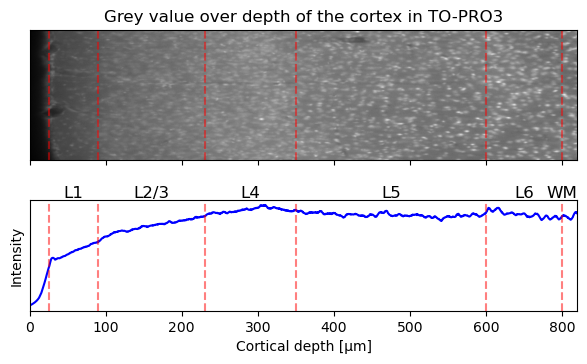

In [8]:
list_of_boundaries = [50, 180, 460, 700, 1200, 1400]
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 4), gridspec_kw={'height_ratios': [2, 1]})

# Plot image
ax1.imshow(np.rot90(img_slice, k=1), aspect=img_slice.shape[1] / img_slice.shape[0], cmap='gray')
ax1.set_title('Grey value over depth of the cortex in TO-PRO3')
ax1.set_yticks([])

# Plotscatter plot
ax2.plot(np.arange(len(intensity_list)), intensity_list, color='blue')
ax2.set_xlim(0, img_slice.shape[0])
ax2.set_xlabel('Cortical depth [µm]')
ax2.set_ylabel('Intensity')
ax2.set_yticks([])

# Add vertical lines
for x in list_of_boundaries:
    ax1.axvline(x, color='red', linestyle='--', alpha=0.5)  # Vertical lines on ax1
    ax2.axvline(x, color='red', linestyle='--', alpha=0.5)  # Vertical lines on ax2

# Add text labels
labels = ['L1', 'L2/3', 'L4', 'L5', 'L6', 'WM']
for i, label in enumerate(labels):
    if i < len(list_of_boundaries) - 1:
        x_pos = (list_of_boundaries[i] + list_of_boundaries[i+1]) / 2
    else:
        x_pos = list_of_boundaries[i]  # Keep "WM" at its original position
    ax2.text(x_pos, ax2.get_ylim()[1] * 1.05, label, ha='center', va='center', color='black', fontsize=12)

# format x-axis ticks
def format_ticks(x, pos):
    return '{:.0f}'.format(round(x * 0.54 / 100) * 100)

# Apply formatter x axis
ax2.xaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.tight_layout()
plt.savefig('cortex_layers.png', dpi=300)
plt.show()


In [ ]:
print(f"List of layer boundaries in px: {np.array(list_of_boundaries)-np.array(list_of_boundaries)[0]}")